# Pre-Lab ELN Actually Building dF/F Traces and Figures

### Name: Kylie Joyce


### Date: 03/20/2022


### PID: 730333803


### Jupyter Notebook Number: 7

## Purpose/Objective:
The purpose of this notebook is to finally get the dFF traces built that we need. We are aiming to figure out running the code to build the dFF traces for each data set, showing all cells for each individual experiment for each dataset overlaid on the same plot. After accomplishing this, we hope to figure out averaging the cells together to only show experiments of each dataset overlaid on one plot. We then hope to average all experiment data into one trace to have a single trace representing each dataset. Accomplishing this last piece will help us to build our second final figure. To address our first figure, we will be building the 3 bar graphs that represent the breakdown of our data into sex, cell type, and stimuli type. This will allow us to get a good look at preliminary figures and adjust/fix anything we need to do. 

## Protocol:
1. Import the Allen data.
2. Import the data set breakdown.
3. Run through all the code from last week.
4. Building from the ground up: build dFF traces and events on one plot for one cell from one experiment from one dataset. 
5. Upon getting that to work, use that code to loop through all cells in all experiments for each data set and construct a single plot representing the dFF traces and the event traces for each subset (8 total). 
6. Talk to Dr. Penton about understanding what needs to be used, event traces of total dFF traces.
7. Use the datasets to build bar graphs for each break down of sex, cell type and stimuli type for figure 1 of our paper. 
8. If we have time, begin looking at averaging all experiment traces per dataset into one trace to have 4 total traces (1 per data set). 
9. If we have time, we will then take the discussion with Dr. Penton and begin brainstorming how to then quantify the results for statistical testing. 
10. If we have time and figure out properly how to do it, try to overlay male and female traces (1 plot containing male and female familiar dataset traces and 1 plot containing male and female novel dataset traces).

## Expected Results:
We expect to successfully build dFF and event traces of each dataset with individual cells starting out but then advancing to overlaying all traces onto one plot for each dataset. We also expect to successfully build the bar graphs for figure 1 and begin working on figure 2. We expect to have an understanding of quanitication needed for statistical testing and hope to have a singular trace per dataset in the end, not per experiment in each dataset. Overall, we hope to have great progress on our figures for the paper. 

### Installing AllenSDK into your local environment. 

In [2]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Packages:

In [3]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

### If working with Visual Coding: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [4]:
#this code block should only be run if you are working with the brain observatory Ca2+ imaging data
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

drive_path = '/overflow/NSCI274/projects/BrainObservatoryOPhysData/'

manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

### If working with Visual Behavior: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [5]:
#this code block should only be run if you are working with the visual behavior Ca2+ imaging data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

data_storage_directory = Path("/overflow/NSCI274/projects/ophysdata")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

### Allen Brain Data

In [6]:
ophys_experiments = cache.get_ophys_experiment_table()

print(f"Total number of ophys experiments: {len(ophys_experiments)}\n")

print(ophys_experiments.columns)

ophys_experiments.head(100)

Total number of ophys experiments: 1941

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'cre_line', 'indicator',
       'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ophys_session_id', 'behavior_session_id', 'ophys_container_id',
       'project_code', 'imaging_depth', 'targeted_structure',
       'date_of_acquisition', 'session_type', 'experience_level', 'passive',
       'image_set', 'file_id'],
      dtype='object')


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980486,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400869
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400919
951980481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400972
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085394308
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878358326,CAM2P.4,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,448900,Ai94(TITL-GCaMP6s),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,136.0,Slc17a7-IRES2-Cre,GCaMP6s,6.0,...,863992815,VisualBehavior,175,VISp,2019-05-30 17:29:35.000000,OPHYS_6_images_B,Novel >1,False,B,879255318
939327156,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459777,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,180.0,Slc17a7-IRES2-Cre,GCaMP6f,1.0,...,930022332,VisualBehavior,175,VISp,2019-09-04 15:26:03.000000,OPHYS_1_images_A,Familiar,False,A,939486362
940354166,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459777,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,181.0,Slc17a7-IRES2-Cre,GCaMP6f,2.0,...,930022332,VisualBehavior,175,VISp,2019-09-05 15:43:21.000000,OPHYS_2_images_A_passive,Familiar,True,A,940418592


### Datasets

#### Male Familiar

In [8]:
plsmales1 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales2 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsmales3 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales4 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# males familiar total is plsmales1 + plsmales2 + plsmales3 + plsmales4
plsmalesf = pd.concat([plsmales1, plsmales2], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales3], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales4], axis=0)
            
plsmalesf.head()
print(len(plsmalesf))

51


In [21]:
plsmalesf.mouse_id.unique()

array([467302, 533527, 546605, 495789, 546819, 524274, 448366, 482853,
       440631, 549976, 476970, 485688, 477202, 498972, 489056, 480753,
       429952, 523922, 453989, 453988, 435431, 453991, 449653, 453990,
       421136, 467951, 467953, 467954])

In [13]:
print(len(plsmalesf.mouse_id.unique()))

28


In [8]:
new_mf = plsmalesf.index

#### Male Novel 

In [9]:
plsmales5 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales6 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsmales7 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales8 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# males novel total is plsmales5 + plsmales6 + plsmales7 + plsmales8

plsmalesn = pd.concat([plsmales5, plsmales6], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales7], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales8], axis=0)
            
plsmalesn.head()
print(len(plsmalesn))

48


In [20]:
plsmalesn.mouse_id.unique()

array([476970, 485688, 477202, 498972, 489056, 480753, 467302, 533527,
       546605, 495789, 546819, 524274, 544965, 448366, 482853, 440631,
       549976, 467951, 467953, 467954, 429952, 453989, 453988, 438912,
       435431, 453991, 453990, 421136])

In [14]:
print(len(plsmalesn.mouse_id.unique()))

28


In [10]:
new_mn = plsmalesn.index

#### Female Familiar

In [10]:
plsfemales1 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales2 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsfemales3 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales4 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# females familiar total is plsfemales1 + plsfemales2 + plsfemales3 + plsfemales4

plsfemalesf = pd.concat([plsfemales1, plsfemales2], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales3], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales4], axis=0)
            
plsfemalesf.head()
print(len(plsfemalesf))

11


In [22]:
plsfemalesf.mouse_id.unique()

array([457841, 470784, 412036, 538219, 523927, 528097, 468866, 489066,
       486737, 492395])

In [16]:
print(len(plsfemalesf.mouse_id.unique()))

10


In [12]:
new_ff = plsfemalesf.index

#### Female Novel

In [11]:
plsfemales5 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales6 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsfemales7 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales8 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# females novel total is plsfemales5 + plsfemales6 + plsfemales7 + plsfemales8

plsfemalesn = pd.concat([plsfemales5, plsfemales6], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales7], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales8], axis=0)
            
plsfemalesn.head()
print(len(plsfemalesn))

13


In [23]:
plsfemalesn.mouse_id.unique()

array([470784, 457841, 489066, 492395, 412036, 544261, 538219, 523927,
       528097, 468866])

In [18]:
print(len(plsfemalesn.mouse_id.unique()))

10


In [14]:
new_fn = plsfemalesn.index

In [24]:
plsmalesf.mouse_id.unique()

array([467302, 533527, 546605, 495789, 546819, 524274, 448366, 482853,
       440631, 549976, 476970, 485688, 477202, 498972, 489056, 480753,
       429952, 523922, 453989, 453988, 435431, 453991, 449653, 453990,
       421136, 467951, 467953, 467954])

In [25]:
plsmalesn.mouse_id.unique()

array([476970, 485688, 477202, 498972, 489056, 480753, 467302, 533527,
       546605, 495789, 546819, 524274, 544965, 448366, 482853, 440631,
       549976, 467951, 467953, 467954, 429952, 453989, 453988, 438912,
       435431, 453991, 453990, 421136])

In [26]:
plsfemalesf.mouse_id.unique()

array([457841, 470784, 412036, 538219, 523927, 528097, 468866, 489066,
       486737, 492395])

In [27]:
plsfemalesn.mouse_id.unique()

array([470784, 457841, 489066, 492395, 412036, 544261, 538219, 523927,
       528097, 468866])

### Creating dF/F traces

#### "Prefered magic functions for jupyter notebook"

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#### Check again how many sessions and format it

In [16]:
print('Number of male inhibitory familiar sessions = {}'.format(len(plsmalesf)))

Number of male inhibitory familiar sessions = 51


In [17]:
print('Number of male inhibitory novel sessions = {}'.format(len(plsmalesn)))

Number of male inhibitory novel sessions = 48


In [18]:
print('Number of female inhibitory familiar sessions = {}'.format(len(plsfemalesf)))

Number of female inhibitory familiar sessions = 11


In [19]:
print('Number of female inhibitory novel sessions = {}'.format(len(plsfemalesn)))

Number of female inhibitory novel sessions = 13


### Male Familiar Experiment 1

In [20]:
ophys_experiment_idmf = plsmalesf.index[0]

datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
ophys_experiment_idmf

961283857

In [21]:
datasetmf.dff_traces.head(10)

,cell_roi_id,dff
cell_specimen_id,,
1086490183,1080759213,"[0.5113319158554077, 0.24553748965263367, 0.52..."
1086490132,1080759218,"[0.6354167461395264, 0.4077703654766083, 0.340..."
1086490621,1080759227,"[0.5312566757202148, 0.4695289134979248, 0.305..."
1086490330,1080759231,"[0.7621955275535583, 0.5847464203834534, 0.430..."
1086490289,1080759234,"[0.9291403889656067, 0.8949682712554932, 0.692..."
1086490068,1080759244,"[0.4910393953323364, 0.5180848240852356, 0.446..."
1086490100,1080759250,"[0.5906590819358826, 0.5741793513298035, 0.327..."
1086489976,1080759256,"[1.2334561347961426, 0.8644771575927734, 1.110..."
1086490217,1080759270,"[2.720043420791626, 2.635056495666504, 2.64893..."


In [22]:
dff_arraymf = np.vstack(datasetmf.dff_traces.dff.values)
print('This array contrains dff traces from {} neurons and it is {} samples long.'.format(dff_arraymf.shape[0], dff_arraymf.shape[1]))

This array contrains dff traces from 14 neurons and it is 140132 samples long.


In [23]:
datasetmf.events.head(14)

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086490183,1080759213,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1394,0.095287
1086490132,1080759218,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0799,0.072132
1086490621,1080759227,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0840,0.074836
1086490330,1080759231,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1078,0.084146
1086490289,1080759234,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1111,0.085036
1086490068,1080759244,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0537,0.059273
1086490100,1080759250,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1009,0.083218
1086489976,1080759256,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0981,0.079948
1086490217,1080759270,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1315,0.092532


In [24]:
datasetmf.ophys_timestamps

array([3.05580000e+00, 3.08810000e+00, 3.12040000e+00, ...,
       4.53119210e+03, 4.53122442e+03, 4.53125673e+03])

In [25]:
cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_idmf = cell_specimen_idsmf[0] # let's pick 1st cell
print('Cell specimen id mf = {}'.format(cell_specimen_idmf)) # print id

Cell specimen id mf = 1086490183


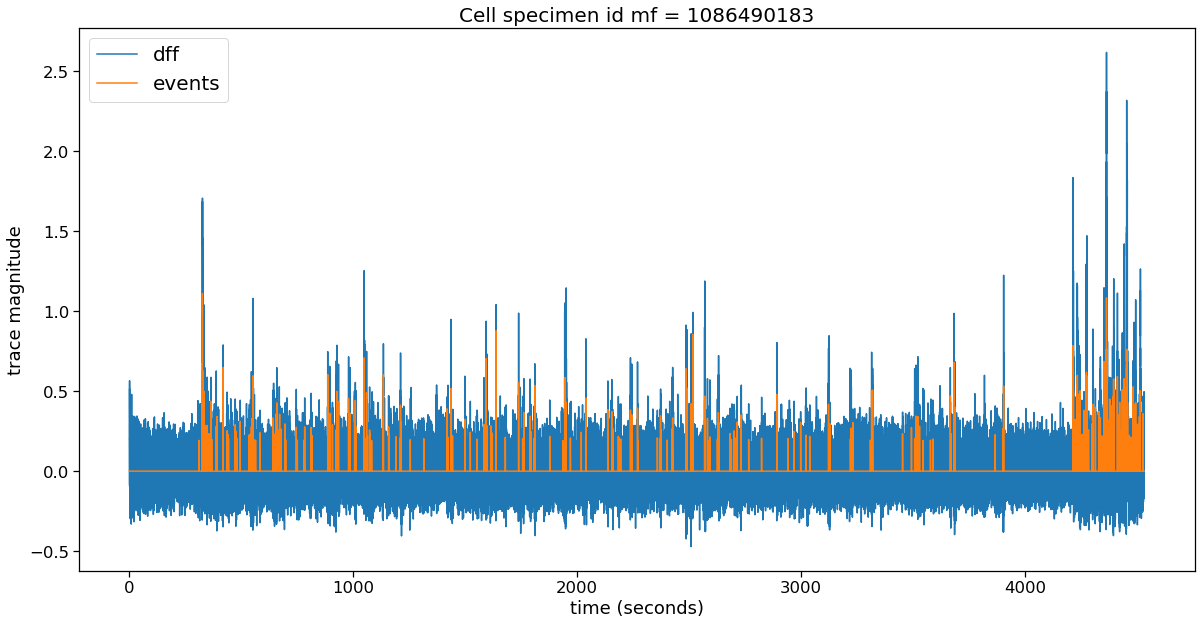

In [26]:
# plot dff and events traces overlaid from the cell selected above
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell_specimen_idmf, 'dff'])
ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell_specimen_idmf, 'events'])
ax.set_xlabel('time (seconds)')
ax.set_ylabel('trace magnitude')
ax.set_title('Cell specimen id mf = {}'.format(cell_specimen_idmf), fontsize = 20)
ax.legend(['dff', 'events'], fontsize = 20)

In [27]:
len(cell_specimen_idsmf)

14

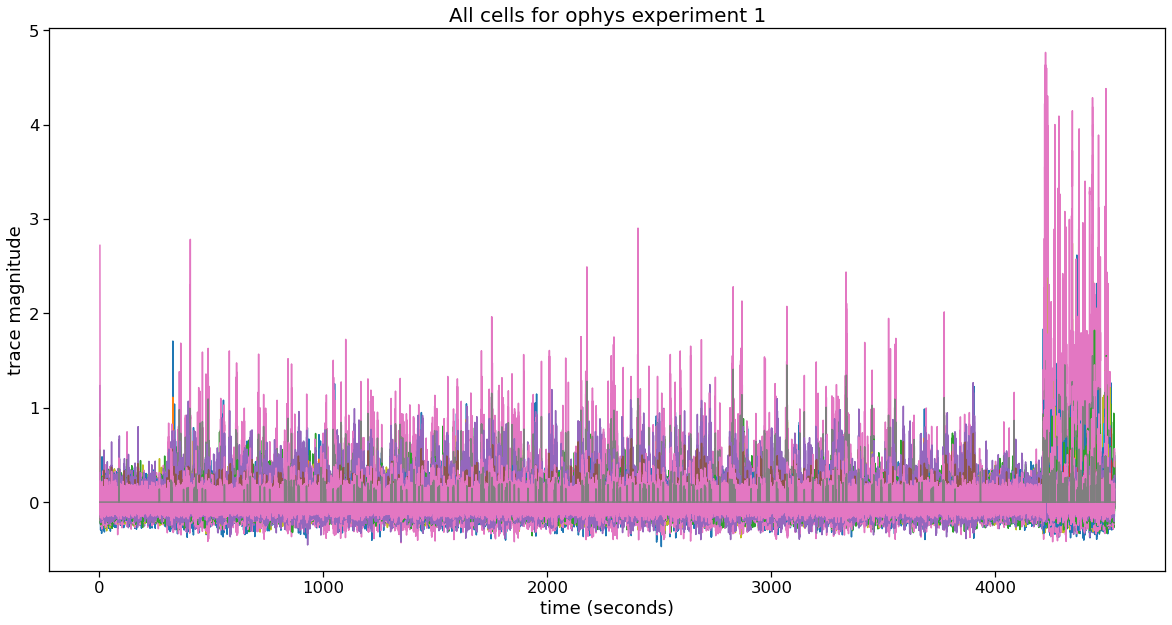

In [28]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for cell in cell_specimen_idsmf:
    ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
    ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
    ax.set_xlabel('time (seconds)')
    ax.set_ylabel('trace magnitude')
    ax.set_title('All cells for ophys experiment 1', fontsize = 20)

### Male Familiar Experiment 2

In [29]:
ophys_experiment_idmf1 = plsmalesf.index[1]

datasetmf1 = cache.get_behavior_ophys_experiment(ophys_experiment_idmf1)
ophys_experiment_idmf1

1050720434

In [30]:
cell_specimen_idsmf1 = datasetmf1.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_idmf1 = cell_specimen_idsmf1[0] # let's pick 1st cell
print('Cell specimen id mf = {}'.format(cell_specimen_idmf1)) # print id

Cell specimen id mf = 1086611102


In [31]:
len(cell_specimen_idsmf1)

9

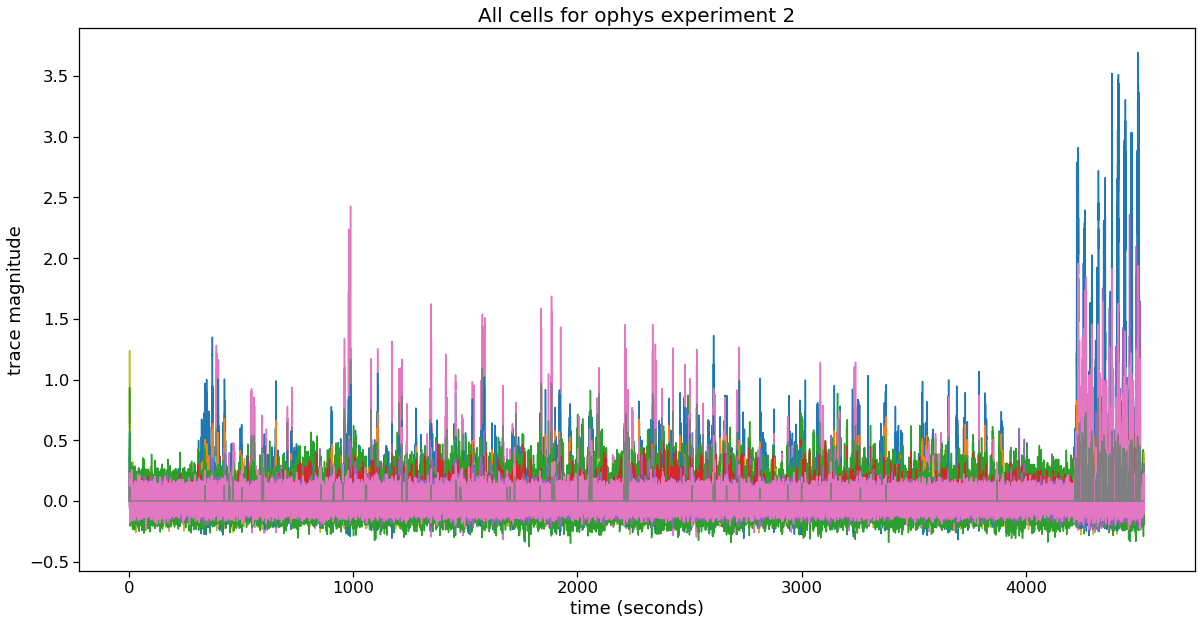

In [32]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for cell in cell_specimen_idsmf1:
    ax.plot(datasetmf1.ophys_timestamps, datasetmf1.dff_traces.loc[cell, 'dff'])
    ax.plot(datasetmf1.ophys_timestamps, datasetmf1.events.loc[cell, 'events'])
    ax.set_xlabel('time (seconds)')
    ax.set_ylabel('trace magnitude')
    ax.set_title('All cells for ophys experiment 2', fontsize = 20)

### Male Familiar Experiment 3

In [33]:
ophys_experiment_idmf2 = plsmalesf.index[2]

datasetmf2 = cache.get_behavior_ophys_experiment(ophys_experiment_idmf2)
ophys_experiment_idmf2

1081264133

In [34]:
cell_specimen_idsmf2 = datasetmf2.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_idmf2 = cell_specimen_idsmf2[0] # let's pick 1st cell
print('Cell specimen id mf = {}'.format(cell_specimen_idmf2)) # print id

Cell specimen id mf = 1120089939


In [35]:
len(cell_specimen_idsmf2)

6

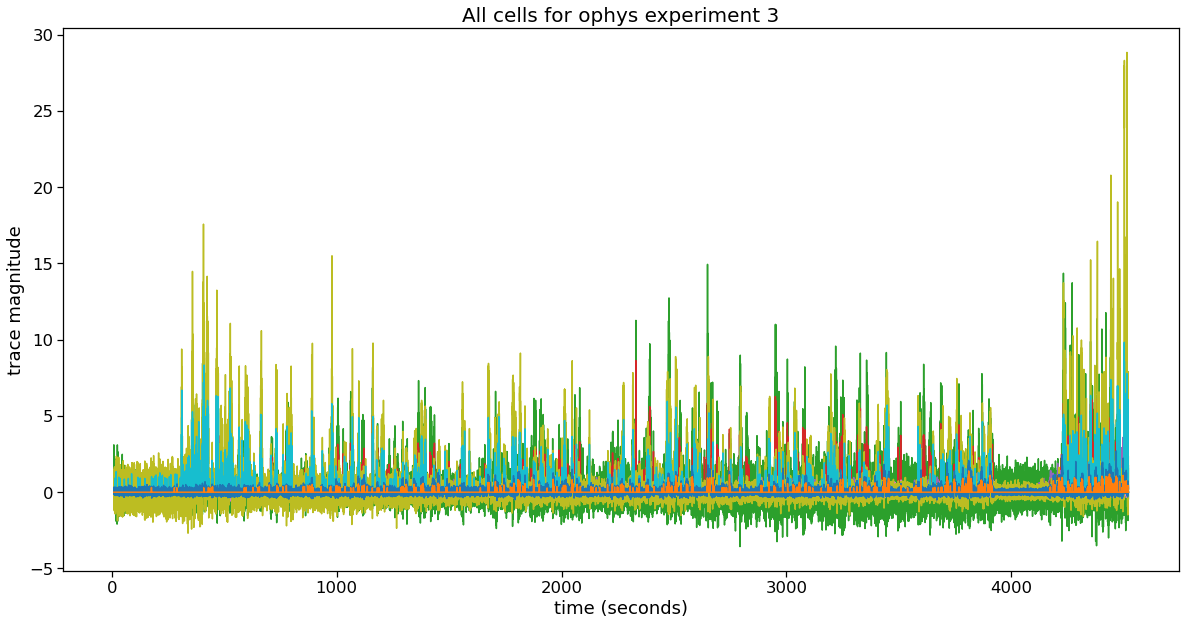

In [36]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for cell in cell_specimen_idsmf2:
    ax.plot(datasetmf2.ophys_timestamps, datasetmf2.dff_traces.loc[cell, 'dff'])
    ax.plot(datasetmf2.ophys_timestamps, datasetmf2.events.loc[cell, 'events'])
    ax.set_xlabel('time (seconds)')
    ax.set_ylabel('trace magnitude')
    ax.set_title('All cells for ophys experiment 3', fontsize = 20)

### Above should show that different cells are being plotted and therefore the code is working to trace different cell activity

### All Male Familiar Traces Laid on One Plot

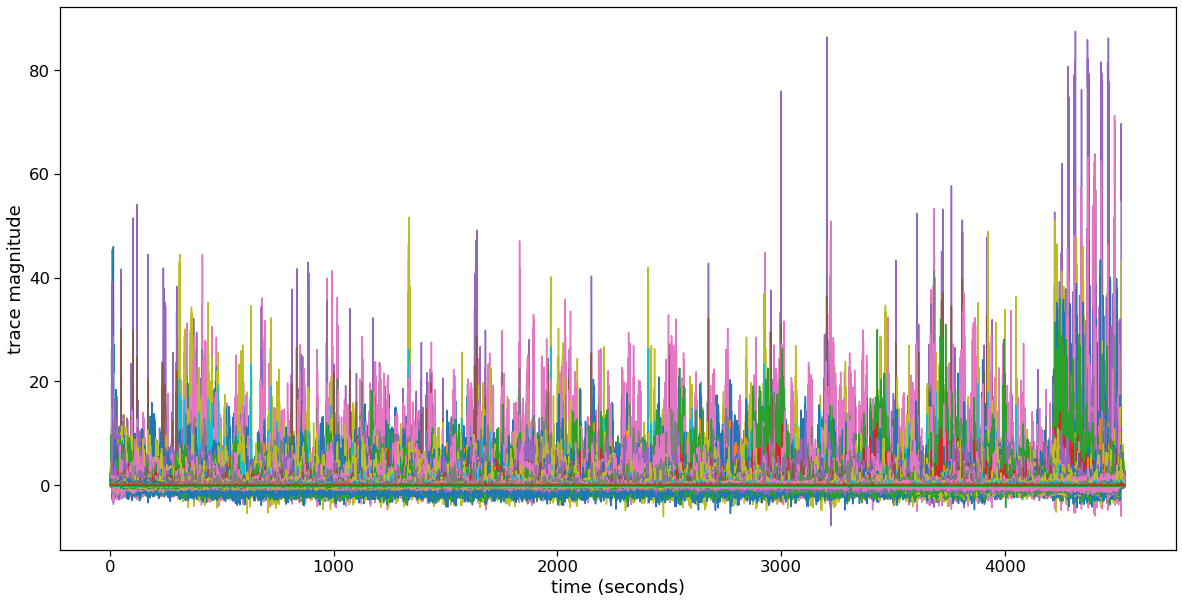

In [37]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for index in range(len(new_mf)):
    ophys_experiment_idmf = plsmalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values
    for cell in cell_specimen_idsmf:
        ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
        ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
        ax.set_xlabel('time (seconds)')
        ax.set_ylabel('trace magnitude')
        #ax.set_title('All cells for ophys experiment 10', fontsize = 20)

### Male Novel 

In [62]:
new_mn = plsmalesn.index
for index in new_mn:
    print(index)

995622557
993593393
982862427
1012112426
1003456269
990381322
965930965
1051989532
1082434498
1008738092
1083519876
1044446322
1077978610
1077978613
1077978611
1077978608
873963889
873963891
986518847
986518852
986518858
853988430
853988437
1085229176
939319851
969809655
965228771
830700800
946513782
946513780
940433468
940433466
940433470
853362765
853362771
891108758
891108765
891108763
891108760
949723709
949723713
949723715
922122728
922122730
922122734
929653466
929653468
807753318


### All Male Novel Traces Laid on One Plot

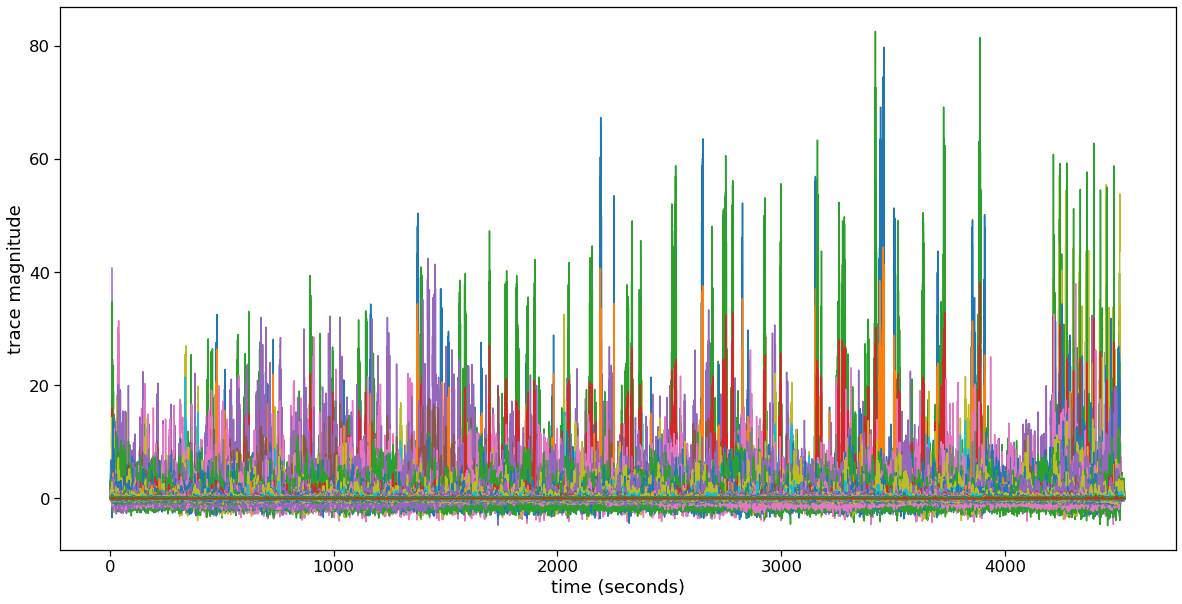

In [63]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for index in range(len(new_mn)):
    ophys_experiment_idmf = plsmalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values
    for cell in cell_specimen_idsmf:
        ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
        ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
        ax.set_xlabel('time (seconds)')
        ax.set_ylabel('trace magnitude')
        #ax.set_title('All cells for ophys experiment 10', fontsize = 20)

### Female Familiar

In [64]:
new_ff = plsfemalesf.index
for index in new_ff:
    print(index)

953659743
953659745
956903375
798404219
1066177684
1053774037
1052412559
943134119
993590480
1004136930
1004136916


### All Female Familiar Traces Laid on One Plot

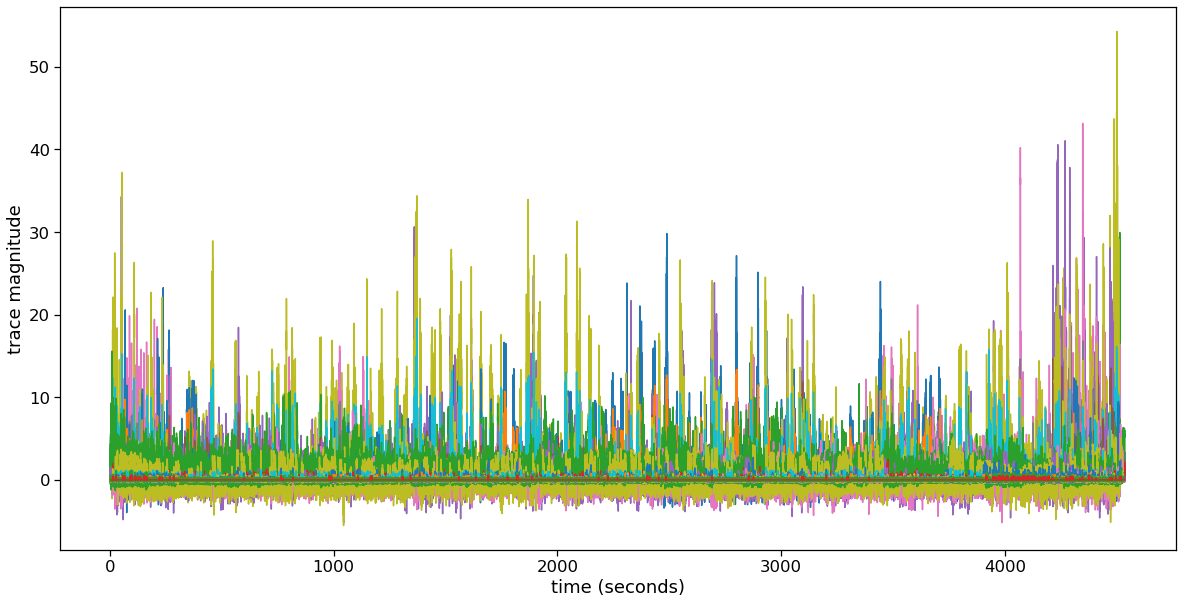

In [65]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for index in range(len(new_ff)):
    ophys_experiment_idmf = plsfemalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values
    for cell in cell_specimen_idsmf:
        ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
        ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
        ax.set_xlabel('time (seconds)')
        ax.set_ylabel('trace magnitude')
        #ax.set_title('All cells for ophys experiment 10', fontsize = 20)

### Female Novel 

In [66]:
new_fn = plsfemalesn.index
for index in new_fn:
    print(index)

960351917
959388790
959388792
959388788
994053909
994956406
1006813726
796108483
1069286458
1068173247
1054266228
1056171522
958435448


### All Female Novel Traces Laid on One Plot

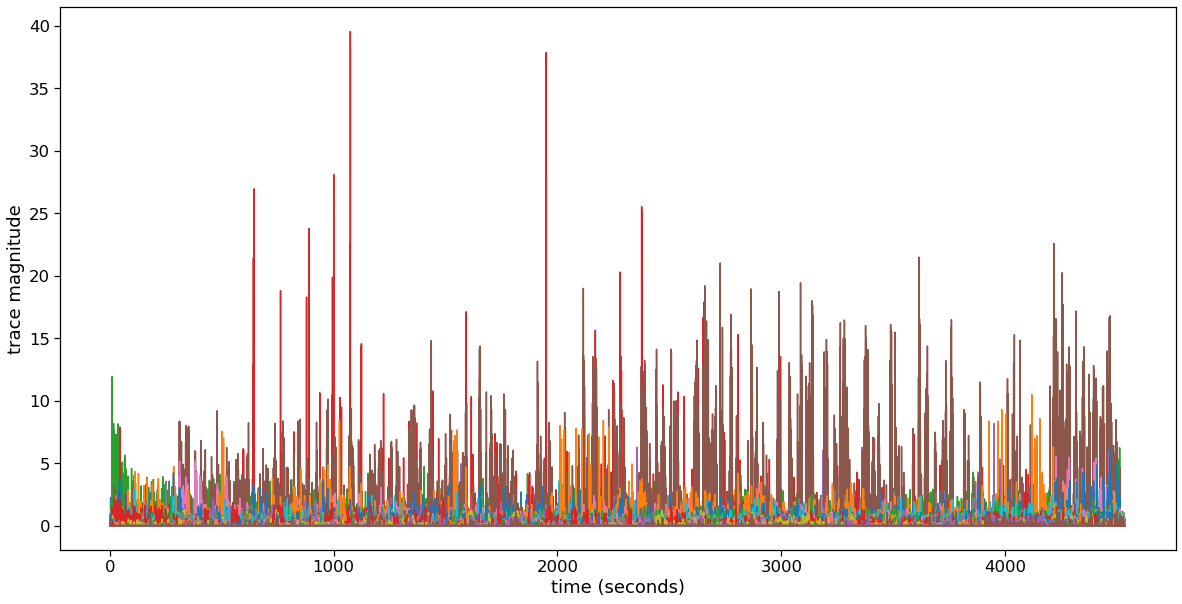

In [68]:
fig, ax =plt.subplots(1,1, figsize = (20,10))
for index in range(len(new_fn)):
    ophys_experiment_idmf = plsfemalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values
    for cell in cell_specimen_idsmf:
        #ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
        ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
        ax.set_xlabel('time (seconds)')
        ax.set_ylabel('trace magnitude')
        #ax.set_title('All cells for ophys experiment 10', fontsize = 20)

Are events more important than the dff traces?

### An average trace of events of all cells for each experiment for male familiar

No handles with labels found to put in legend.


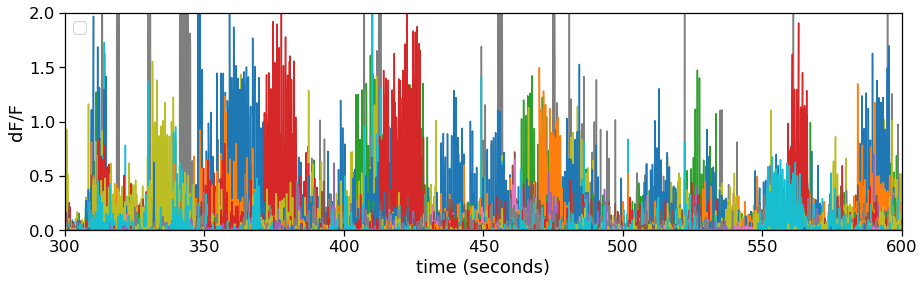

In [69]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_mf)): 
    # get the dataset object
    ophys_experiment_idmf = plsmalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

### An average dFF trace of all cells for each experiment for males familiar

No handles with labels found to put in legend.


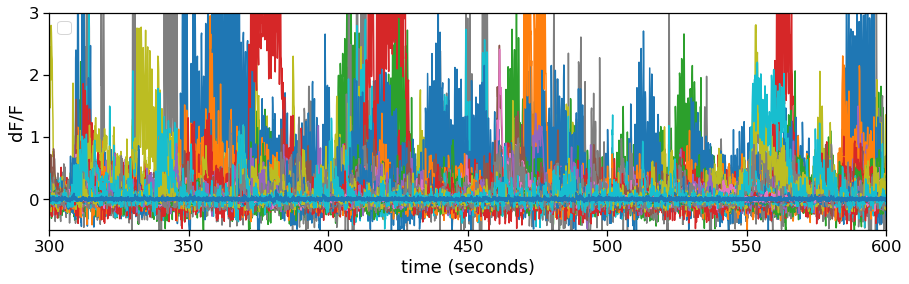

In [70]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_mf)): 
    # get the dataset object
    ophys_experiment_idmf = plsmalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = datasetmf.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(-0.5,3)
ax.legend()

### An average trace of events of all cells for each experiment for males novel 

No handles with labels found to put in legend.


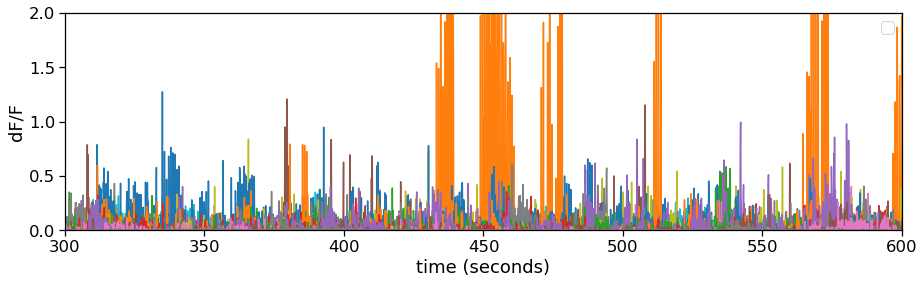

In [71]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_mn)): 
    # get the dataset object
    ophys_experiment_idmf = plsmalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

### An average dFF trace of all cells for each experiment for males novel 

No handles with labels found to put in legend.


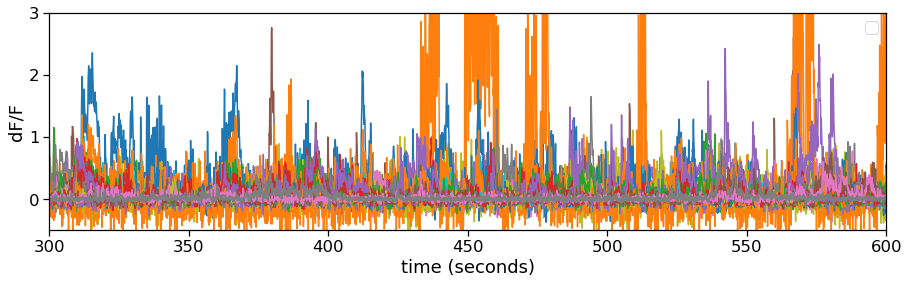

In [72]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_mn)): 
    # get the dataset object
    ophys_experiment_idmf = plsmalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = datasetmf.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(-0.5,3)
ax.legend()

### An average trace of events of all cells for each experiment for females familiar

No handles with labels found to put in legend.


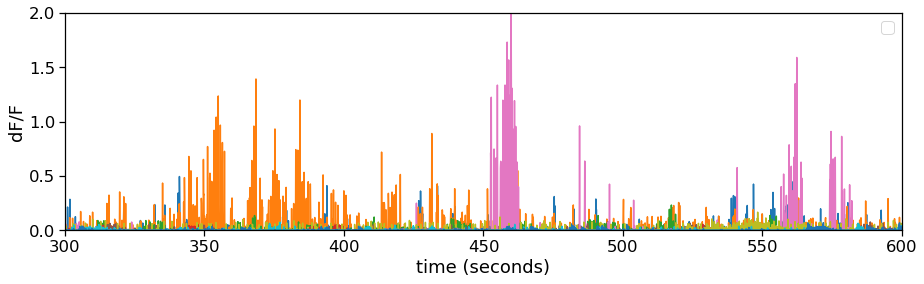

In [73]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_ff)): 
    # get the dataset object
    ophys_experiment_idmf = plsfemalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

### An average dFF trace of all cells for each experiment for females familiar

No handles with labels found to put in legend.


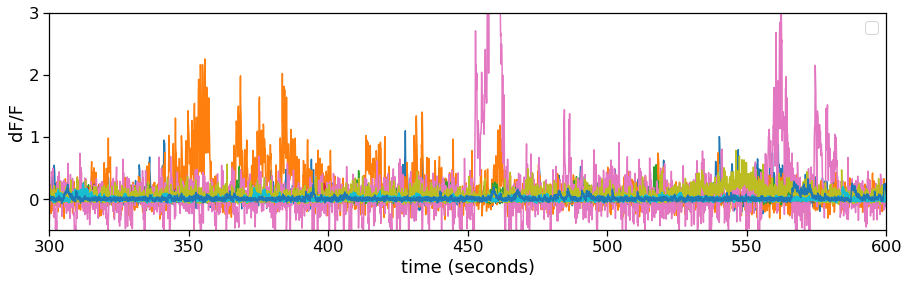

In [74]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_ff)): 
    # get the dataset object
    ophys_experiment_idmf = plsfemalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = datasetmf.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(-0.5,3)
ax.legend()

### An average trace of events of all cells for each experiment for females novel

No handles with labels found to put in legend.


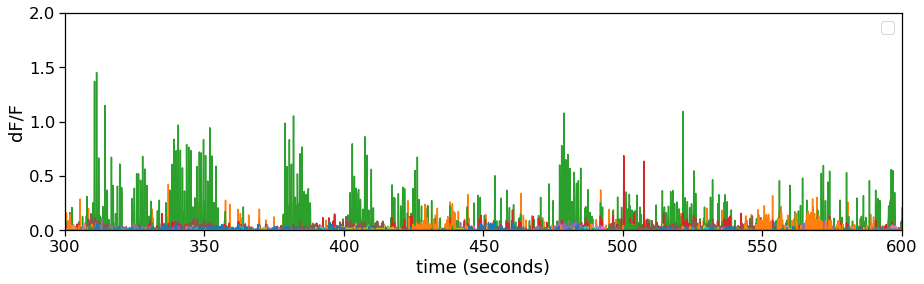

In [75]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_fn)): 
    # get the dataset object
    ophys_experiment_idmf = plsfemalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

### An average dFF trace of all cells for each experiment for female novel 

No handles with labels found to put in legend.


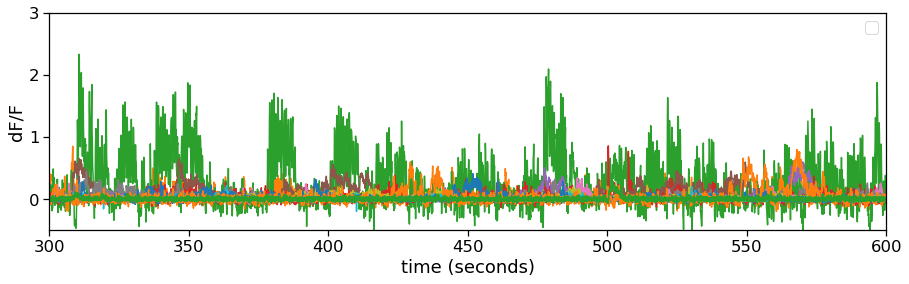

In [76]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_fn)): 
    # get the dataset object
    ophys_experiment_idmf = plsfemalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = datasetmf.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(-0.5,3)
ax.legend()

### Where do we move onto quantifying from here? 

In [77]:
### Hopefully fill in after discussing with Dr. Penton

## Making bar graphs for figure 1

#### Need old breakdowns of data to see inhibitory and excitatory numbers

In [78]:
M_ophys_exp_data = ophys_experiments[ophys_experiments.sex == 'M']
type(M_ophys_exp_data)
print("Total Number of Males is: " + str(len(M_ophys_exp_data)))

F_ophys_exp_data = ophys_experiments[ophys_experiments.sex == 'F']
print("Total Number of Females is: " + str(len(F_ophys_exp_data)))
M_ophys_exp_data

Total Number of Males is: 1267
Total Number of Females is: 674


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
993862620,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,194.0,Sst-IRES-Cre,GCaMP6f,1.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-11 19:01:03.000000,OPHYS_1_images_B,Familiar,False,B,993906653
994053903,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,195.0,Sst-IRES-Cre,GCaMP6f,2.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-12 20:47:45.000000,OPHYS_2_images_B_passive,Familiar,True,B,994098960
994278281,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,196.0,Sst-IRES-Cre,GCaMP6f,3.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-13 20:34:10.000000,OPHYS_3_images_B,Familiar,False,B,994320564
994790561,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,199.0,Sst-IRES-Cre,GCaMP6f,3.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-16 21:20:41.000000,OPHYS_3_images_B,Familiar,False,B,994831840
994955425,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,200.0,Sst-IRES-Cre,GCaMP6f,4.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-17 19:02:07.000000,OPHYS_4_images_A,Novel 1,False,A,995003435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962473308,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467954,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,174.0,Vip-IRES-Cre,GCaMP6f,3.0,...,969421516,VisualBehaviorTask1B,175,VISp,2019-10-07 15:16:44.000000,OPHYS_3_images_B,Familiar,False,B,962685182
963394081,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467954,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,175.0,Vip-IRES-Cre,GCaMP6f,2.0,...,969421516,VisualBehaviorTask1B,175,VISp,2019-10-08 15:27:11.000000,OPHYS_2_images_B_passive,Familiar,True,B,963457965
964440177,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467954,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,176.0,Vip-IRES-Cre,GCaMP6f,4.0,...,969421516,VisualBehaviorTask1B,175,VISp,2019-10-09 15:26:19.000000,OPHYS_4_images_A,Novel 1,False,A,964778206


In [79]:
M_Excitatory_ophys_exp_id = (M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt']
                + M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt'])

print("Total Number of Male Neurons that are Excitatory is: " + str(len(M_Excitatory_ophys_exp_id)))

M_Inhibitory_ophys_exp_id = (M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt']
                + M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt'])

print("Total Number of Male Neurons that are Inhibitory is: " + str(len(M_Inhibitory_ophys_exp_id)))

Total Number of Male Neurons that are Excitatory is: 36
Total Number of Male Neurons that are Inhibitory is: 705


In [80]:
F_Excitatory_ophys_exp_id = (F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt']
                + F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt'])

print("Total number of inhibitory neurons measured for females is: " + str(len(F_Excitatory_ophys_exp_id)))

F_Inhibitory_ophys_exp_id = (F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt']
                + F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt'])

print("Total number of inhibitory neurons measured for females is: " + str(len(F_Inhibitory_ophys_exp_id)))

Total number of inhibitory neurons measured for females is: 20
Total number of inhibitory neurons measured for females is: 365


In [81]:
M_Excitatory_ophys_exp_tot = []
for i in range(len(M_ophys_exp_data)):
    full_genotype = M_ophys_exp_data.iloc[i,1]
    x = M_ophys_exp_data.iloc[i].array
    if full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt':
        M_Excitatory_ophys_exp_tot.append(x)
    elif full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt':
        M_Excitatory_ophys_exp_tot.append(x)
print("The number of excitatory neurons measured for males is: " + str(len(M_Excitatory_ophys_exp_tot)))

The number of excitatory neurons measured for males is: 36


In [82]:
F_Excitatory_ophys_exp_tot = []

for i in range(len(F_ophys_exp_data)):
    full_genotype = F_ophys_exp_data.iloc[i,1]
    x = F_ophys_exp_data.iloc[i].array
    if full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt':
        F_Excitatory_ophys_exp_tot.append(x)
    elif full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt':
        F_Excitatory_ophys_exp_tot.append(x)
print("The number of excitatory neurons measured for females is: " + str(len(F_Excitatory_ophys_exp_tot)))

The number of excitatory neurons measured for females is: 20


In [83]:
M_Inhibitory_ophys_exp_tot = []

for i in range(len(M_ophys_exp_data)):
    full_genotype = M_ophys_exp_data.iloc[i,1]
    x = M_ophys_exp_data.iloc[i].array
    if full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        M_Inhibitory_ophys_exp_tot.append(x)
    elif full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        M_Inhibitory_ophys_exp_tot.append(x)
print("The number of inhibitory neurons measured for males is: " + str(len(M_Inhibitory_ophys_exp_tot)))

The number of inhibitory neurons measured for males is: 705


In [84]:
F_Inhibitory_ophys_exp_tot = []

for i in range(len(F_ophys_exp_data)):
    full_genotype = F_ophys_exp_data.iloc[i,1]
    x = F_ophys_exp_data.iloc[i].array
    if full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        F_Inhibitory_ophys_exp_tot.append(x)
    elif full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        F_Inhibitory_ophys_exp_tot.append(x)
print("The number of inhibitory neurons measured for females is: " + str(len(F_Inhibitory_ophys_exp_tot)))

The number of inhibitory neurons measured for females is: 365


In [85]:
M_IOET_VISp = []

for i in range(len(M_Inhibitory_ophys_exp_tot)):
    target_structure = M_Inhibitory_ophys_exp_tot[i][18]
    x = M_Inhibitory_ophys_exp_tot[i]
    if target_structure == 'VISp':
        M_IOET_VISp.append(x)
print("The number of inhibitory neurons measured for males in the VISp is: " + str(len(M_IOET_VISp)))

The number of inhibitory neurons measured for males in the VISp is: 391


In [86]:
F_IOET_VISp = []

for i in range(len(F_Inhibitory_ophys_exp_tot)):
    target_structure = F_Inhibitory_ophys_exp_tot[i][18]
    x = F_Inhibitory_ophys_exp_tot[i]
    if target_structure == 'VISp':
        F_IOET_VISp.append(x)
print("The number of inhibitory neurons measured for females in the VISp is: " + str(len(F_IOET_VISp)))

The number of inhibitory neurons measured for females in the VISp is: 155


In [87]:
M_IOETV_Familiar = []

for i in range(len(M_IOET_VISp)):
    session_type = M_IOET_VISp[i][20]
    x = M_IOET_VISp[i]
    if session_type == 'OPHYS_2_images_A_passive':
        M_IOETV_Familiar.append(x)
    elif session_type == 'OPHYS_2_images_B_passive':
        M_IOETV_Familiar.append(x)
print("The number of trials for males passively viewing familiar images is: " + str(len(M_IOETV_Familiar)))

The number of trials for males passively viewing familiar images is: 51


In [88]:
M_IOETV_Novel = []

for i in range(len(M_IOET_VISp)):
    session_type = M_IOET_VISp[i][20]
    x = M_IOET_VISp[i]
    if session_type == 'OPHYS_5_images_A_passive':
        M_IOETV_Novel.append(x)
    elif session_type == 'OPHYS_5_images_B_passive':
        M_IOETV_Novel.append(x)
print("The number of trials males passively viewing novel images is: " + str(len(M_IOETV_Novel)))

The number of trials males passively viewing novel images is: 48


In [89]:
F_IOETV_Familiar = []

for i in range(len(F_IOET_VISp)):
    session_type = F_IOET_VISp[i][20]
    x = F_IOET_VISp[i]
    if session_type == 'OPHYS_2_images_A_passive':
        F_IOETV_Familiar.append(x)
    elif session_type == 'OPHYS_2_images_B_passive':
        F_IOETV_Familiar.append(x)
print("The number of trials for females passively viewing familiar images is: " + str(len(F_IOETV_Familiar)))

The number of trials for females passively viewing familiar images is: 11


In [90]:
F_IOETV_Novel = []

for i in range(len(F_IOET_VISp)):
    session_type = F_IOET_VISp[i][20]
    x = F_IOET_VISp[i]
    if session_type == 'OPHYS_5_images_A_passive':
        F_IOETV_Novel.append(x)
    elif session_type == 'OPHYS_5_images_B_passive':
        F_IOETV_Novel.append(x)
print("The number of trials females passively viewing novel images is: " + str(len(F_IOETV_Novel)))

The number of trials females passively viewing novel images is: 13


### Sex Breakdown Bar Graph

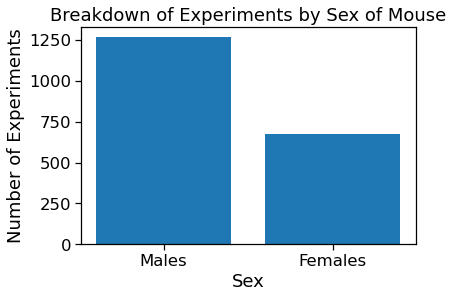

In [91]:
Sexes = ['Males','Females']
num_of_exp = [len(M_ophys_exp_data),len(F_ophys_exp_data)]

plt.bar(Sexes, num_of_exp)
plt.title('Breakdown of Experiments by Sex of Mouse')
plt.xlabel('Sex')
plt.ylabel('Number of Experiments')
plt.show()

### Cell Type Breakdown by Sex Bar Graph

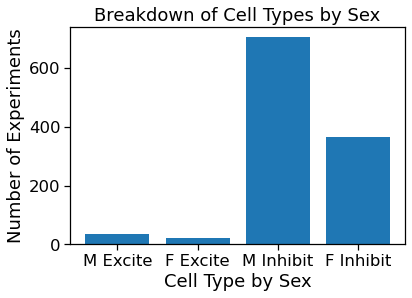

In [92]:
Cells = ['M Excite','F Excite', 'M Inhibit', 'F Inhibit']
num_of_cells = [len(M_Excitatory_ophys_exp_tot),len(F_Excitatory_ophys_exp_tot), len(M_Inhibitory_ophys_exp_tot), len(F_Inhibitory_ophys_exp_tot)]

plt.bar(Cells, num_of_cells)
plt.title('Breakdown of Cell Types by Sex')
plt.xlabel('Cell Type by Sex')
plt.ylabel('Number of Experiments')
plt.show()

### Stimuli type by sex after selecting only inhibitory cells

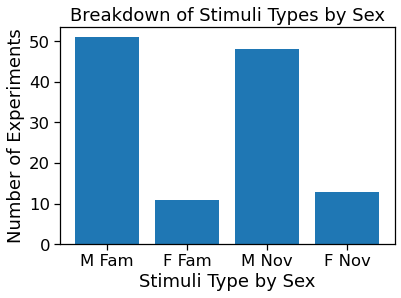

In [93]:
Stimuli_type_per_sex = ['M Fam','F Fam', 'M Nov', 'F Nov']
num_of_stim = [len(M_IOETV_Familiar),len(F_IOETV_Familiar), len(M_IOETV_Novel), len(F_IOETV_Novel)]

plt.bar(Stimuli_type_per_sex, num_of_stim)
plt.title('Breakdown of Stimuli Types by Sex')
plt.xlabel('Stimuli Type by Sex')
plt.ylabel('Number of Experiments')
plt.show()

### If we have time after talking to Dr. Penton and doing everything above, we will begin trying to average the traces together to form one singular trace per dataset (in the instance that the code above works)

### If there is time after this and we figure out averaging to form a singular trace, we will begin trying to overlay them on one plot (one male and one female trace on one plot for familiar and same for novel).

#### Attempting to average all male familiar experiment traces into 1 trace

In [ ]:
all_male_fam = []

for index in range(len(new_mf)):
    ophys_experiment_idmf = plsmalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    dff_events = datasetmf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    all_male_fam.append(average_dFFevents)
    
all_male_fam = pd.DataFrame(all_male_fam)

In [95]:
len(all_male_fam)

51

In [108]:
all_male_fam.head()

AttributeError: 'list' object has no attribute 'head'

ValueError: multi-line expressions are only valid in the context of data, use DataFrame.eval

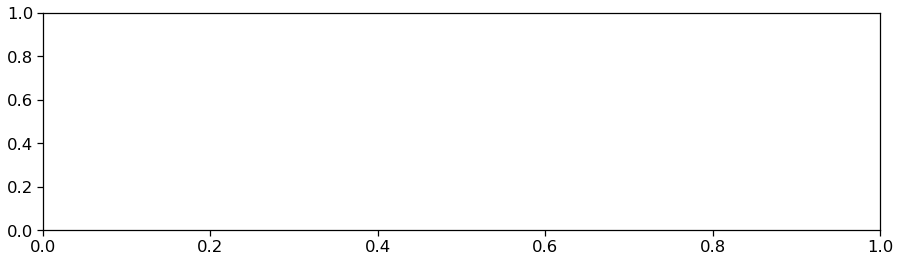

In [85]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(all_male_fam)): 
    # get the dataset object
    ophys_experiment_idmf = all_male_fam[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

#### Attempting to average all male novel experiment traces into 1 trace

In [ ]:
all_male_nov = []

for index in range(len(new_mn)):
    ophys_experiment_idmf = plsmalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    dff_events = datasetmf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    all_male_nov.append(average_dFFevents)
    
all_male_nov = pd.DataFrame(all_male_nov)

In [ ]:
len(all_male_nov)

In [ ]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(all_male_nov)): 
    # get the dataset object
    ophys_experiment_idmf = all_male_nov[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

#### Attempting to average all female familiar experiments into 1 trace

In [ ]:
all_female_fam = []

for index in range(len(new_ff)):
    ophys_experiment_idmf = plsfemalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    dff_events = datasetmf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    all_female_fam.append(average_dFFevents)
    
all_female_fam = pd.DataFrame(all_female_fam)

In [ ]:
len(all_female_fam)

In [ ]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(all_female_fam)): 
    # get the dataset object
    ophys_experiment_idmf = all_female_fam[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

#### Attempting to averagae all female novel experiments into 1 trace

In [ ]:
all_female_nov = []

for index in range(len(new_fn)):
    ophys_experiment_idmf = plsfemalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    dff_events = datasetmf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    all_female_nov.append(average_dFFevents)
    
all_female_nov = pd.DataFrame(all_female_nov)

In [ ]:
len(all_female_nov)

In [ ]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(all_female_nov)): 
    # get the dataset object
    ophys_experiment_idmf = all_female_nov[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

## Resources:
https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_ophys_data_access.html
https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_ophys_dataset_manifest.html
https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_load_ophys_data.html

### Sample Allen Jupyter Notebooks to get started:
https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html
https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html
https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html

